<a href="https://colab.research.google.com/github/yumi-kim/big_data_class/blob/master/%EC%BD%94%EB%94%A94%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
cd gdrive/My\ Drive/bbd2019

In [0]:
cd gdrive/My\ Drive/analysis/경상대/2019
cd 8.\ 강의
cd 2019바이오빅데이터/
cd 2019바이오빅데이터\ 수업자료

/content/gdrive/My Drive/analysis/경상대/2019


In [0]:
# Hardy-weinberg equilibrium 
# number of loci    : 50
# number of samples : 10000
# number of alleles in locus : 2
# what we need to set : allele freq 
import numpy as np

num_samples = 10000
num_loci    = 50
num_alleles = 2

locus_list = []
for i in range(num_loci):
  p = np.random.random(num_alleles)
  p = p/sum(p)
  maternal_gt = np.random.choice(range(num_alleles),p=p,size=num_samples)
  paternal_gt = np.random.choice(range(num_alleles),p=p,size=num_samples)
  locus = [''.join(map(str,np.sort(x))) for x in zip(maternal_gt,paternal_gt)]
  locus_list.append(locus)

In [0]:
import pandas as pd
from collections import Counter
df_hwe = pd.DataFrame(np.array(locus_list))

In [0]:
chisqr_list = []
pvalue_list = []
for ix in df_hwe.index:
  alleles = []
  for x in df_hwe.loc[ix]:
    alleles += list(x)
  allele_count = dict(Counter(alleles))
  allele_frq = {}
  for allele in allele_count:
    allele_frq[allele] = allele_count[allele]/(num_samples*2)
  gt_count_obs = dict(Counter(df_hwe.loc[ix]))
  df_chi = pd.DataFrame()
  for gt in gt_count_obs:
    df_chi.at[gt,'obs'] = gt_count_obs[gt]
    a1 = gt[0]
    a2 = gt[1]
    if a1 == a2:
      gt_frq = allele_frq[a1]**2
    else:
      gt_frq = allele_frq[a1] * allele_frq[a2] * 2
    df_chi.at[gt,'est'] = num_samples * gt_frq
  df_chi['e_chi'] = (df_chi['obs'] - df_chi['est'])**2/df_chi['est'] 
  chisqr = df_chi['e_chi'].sum()
  pvalue = chi2.sf(chisqr,1)
  chisqr_list.append(chisqr)
  pvalue_list.append(pvalue)

(array([4., 5., 5., 7., 3., 2., 8., 6., 3., 7.]),
 array([0.00501491, 0.10259132, 0.20016774, 0.29774415, 0.39532057,
        0.49289698, 0.5904734 , 0.68804981, 0.78562623, 0.88320265,
        0.98077906]),
 <a list of 10 Patch objects>)

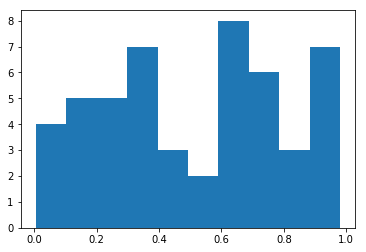

In [0]:
import matplotlib.pyplot as plt
plt.hist(pvalue_list)

In [0]:
from scipy.stats.distributions import chi2

In [0]:
chi2.sf(chisqr,1)

0.590003590667227